# **Exploratory Data Analysis of Capital Bikeshare**

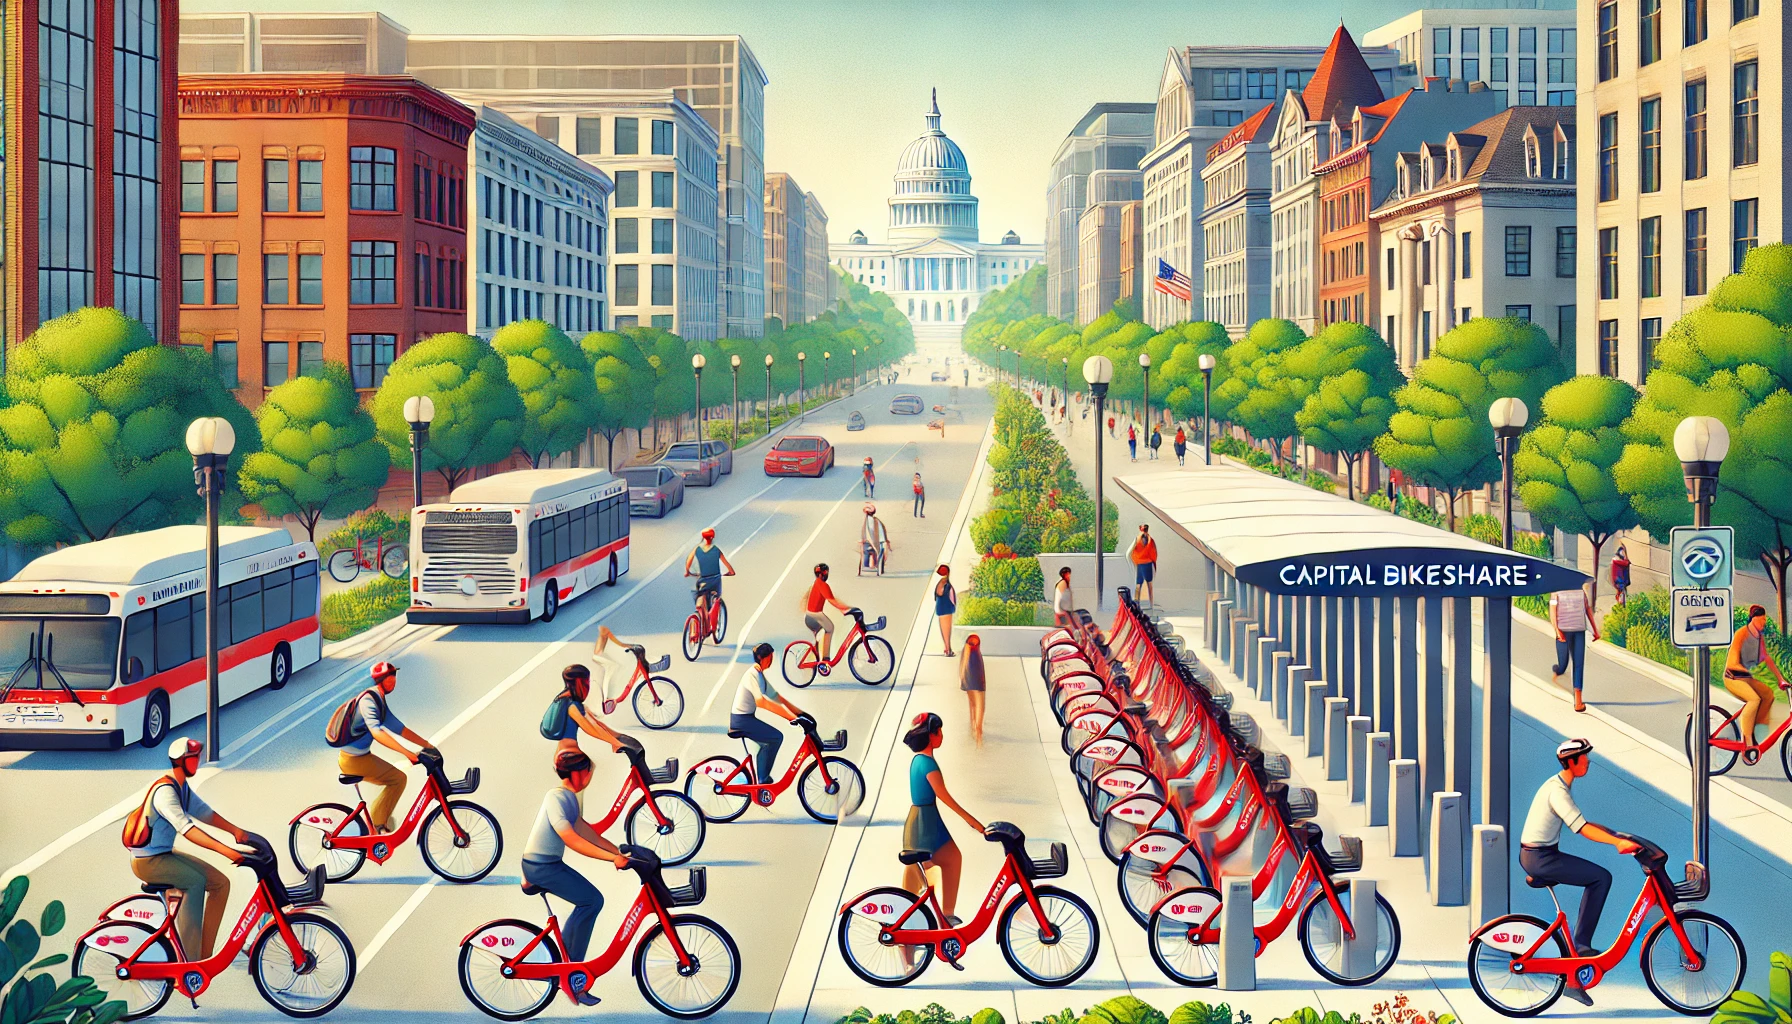

# ✨ About Dataset ✨
- Daily rent data
 - ride_id: ride id
 - rideable_type: ride type. I.e. docked_bike, electric_bike, classic_bike
 - started_at: start date and time
 - ended_at: end date and time
 - start_station_name: starting station name
 - start_station_id: starting station id
 - end_station_name: ending station name
 - end_station_id: ending station id
 - start_lat: start latitude
 - start_lng: start longitude
 - end_lat: end latitude
 - end_lng: end longitude
 - member_casual: Indicates whether user was a "registered" member (Annual
   Member, 30-Day Member or Day Key Member) or a "casual" rider (Single Trip, 24-Hour Pass, 3-Day Pass or 5-Day Pass). I.e. casual, member
Data source: https://capitalbikeshare.com/system-data

- Station list
  - station_id: station id
  - station_name: station name
  - Data source: organized from Daily rent data
  - Usage frequency
  - date: date
  - station_name: station name
  - pickup_counts: daily pickup of the station
  - dropoff_counts: daily dropoff of the station
  - Data source: organized from Daily rent data

- Weather
  - name: location
  - datetime: date
  - tempmax: maximum temperature at the location.
  - tempmin: minimum temperature at the location.
  - temp: temperature at the location. Daily values are average values (mean) for the day.
  - feelslikemax: maximum feels like temperature at the location.
  - feelslikemin: minimum feels like temperature at the location.
  - feelslike: what the temperature feels like accounting for heat index or wind chill. Daily values are average values (mean) for the day.
  - dew: dew point temperature
  - humidity: relative humidity in %
  - precip: the amount of liquid precipitation that fell or is predicted to fall in the period.
  - precipprob: the likelihood of measurable precipitation ranging from 0% to 100%
  - precipcover: the proportion of hours where there was non-zero precipitation
  - preciptype: an array indicating the type(s) of precipitation expected or that occurred.
  - snow: the amount of snow that fell or is predicted to fall  
  - snowdepth: the depth of snow on the ground
  - windgust: instantaneous wind speed at a location
  - windspeed: the sustained wind speed measured as the average windspeed that occurs during the preceding one to two minutes. Daily values are the maximum hourly value for the day.
  - winddir: direction from which the wind is blowing
  - sealevelpressure: the sea level atmospheric or barometric pressure in millibars
  - cloudcover: the sea level atmospheric or barometric pressure in millibars
  - visibility: distance at which distant objects are visible
  - solarradiation: (W/m2) the solar radiation power at the instantaneous moment of the observation (or forecast prediction)
  - solarenergy: (MJ /m2 ) indicates the total energy from the sun that builds up over a day.
  - uvindex: a value between 0 and 10 indicating the level of ultra violet (UV) exposure for that day.
  - severerisk: a value between 0 and 100 representing the risk of convective storms
  - sunrise: the formatted time of the sunrise
  - sunset: the formatted time of the sunset
  - moonphase: represents the fractional portion through the current moon lunation cycle ranging from 0 (the new moon) to 0.5 (the full moon) and back  to 1 (the next new moon)
  - conditions: textual representation of the weather conditions.
description: longer text descriptions suitable for displaying in weather displays
  - icon: a fixed, machine readable summary that can be used to display an icon
stations: the weather stations used when collecting a historical observation record
   Data source : https://www.visualcrossing.com/




---



<a id="top"></a>

## **Table of Contents**

* [0. Import Library](#0)
* [1. Exploratory Data Analysis](#1)
    * [1.1 Basis Datasets Information](#1.1)
    * [1.2 Data Understanding](#1.2)
        * [1.2.1 Data Types Information](#1.2.2)
        * [1.2.2 Statistical Data Information](#1.2.3)
        * [1.2.3 Checking Missing Values](#1.2.4)
    * [1.3 Data Cleaning](#1.3)
        * [1.3.1 Handling Missing Values](#1.3.1)
        * [1.3.2 Label Encoder](#1.3.2)
    * [1.4 Univariate Analysis](#1.4)
        * [1.4.1 Barplot](#1.4.1)
        * [1.4.2 Piechart](#1.4.2)
        * [1.4.3 Lineplot](#1.4.3)
    * [1.5 Multivariate Analysis](#1.4)
        * [1.5.1 Correlation Heatmap](#1.5.1)
    * [1.6 Feature Engineering](#1.6)
        * [1.6.1 Sunhour](#1.6.1)
    * [1.7 Inractive Dashboard with Dash](#1.7)



# Import Library

In [ ]:
import pandas as pd
import numpy as np
import kagglehub
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns

In [ ]:
path = kagglehub.dataset_download("taweilo/capital-bikeshare-dataset-202005202408")

print("Path to dataset files:", path)

100%|██████████| 556M/556M [00:09<00:00, 63.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/taweilo/capital-bikeshare-dataset-202005202408/versions/2


# Exploratory Data Analysis

# Basis Data Information



In [ ]:
data_bikes = pd.read_csv(path + "/daily_rent_detail.csv")
weather = pd.read_csv(path + _____)
station_list = pd.read_csv(path + "/station_list.csv")
usage_frequency = pd.read_csv(path + "/usage_frequency.csv")

<ipython-input-5-494449f9bd23>:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_bikes = pd.read_csv(path + "/daily_rent_detail.csv")


In [ ]:
data_bikes.____

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,946D42AD89539210,docked_bike,2020-05-30 17:25:29,2020-05-31 18:25:22,Anacostia Library,31804,11th & H St NE,31614.0,38.865784,-76.978400,38.899983,-76.991383,casual
1,CC46FAAB662B8613,docked_bike,2020-05-09 14:42:04,2020-05-09 15:06:33,10th & E St NW,31256,21st St & Constitution Ave NW,31261.0,38.895914,-77.026064,38.892459,-77.046567,member
2,72F00B2FB833D6ED,docked_bike,2020-05-24 17:27:19,2020-05-24 17:43:51,Connecticut Ave & Newark St NW / Cleveland Park,31305,12th & U St NW,31268.0,38.934267,-77.057979,38.916787,-77.028139,member
3,4DFBE6AED989DF35,docked_bike,2020-05-27 15:29:52,2020-05-27 15:47:13,Connecticut Ave & Newark St NW / Cleveland Park,31305,14th & Belmont St NW,31119.0,38.934267,-77.057979,38.921074,-77.031887,casual
4,1AAFE6B4331AB9DF,docked_bike,2020-05-31 14:06:03,2020-05-31 14:30:30,Georgia Ave & Morton St NW,31419,17th & K St NW,31213.0,38.932128,-77.023500,38.902760,-77.038630,casual


In [ ]:
weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Washington,DC,USA",2020-05-01,18.8,11.6,14.9,18.8,11.6,14.9,8.9,69.6,...,9.5,6,NaN,2020-05-01T06:09:41,2020-05-01T20:01:16,0.30,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."
1,"Washington,DC,USA",2020-05-02,22.1,11.1,16.3,22.1,11.1,16.3,6.4,54.0,...,14.0,9,NaN,2020-05-02T06:08:30,2020-05-02T20:02:13,0.33,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,F0198,KGAI,KADW,K..."
2,"Washington,DC,USA",2020-05-03,24.9,15.6,18.6,24.9,15.6,18.6,13.4,72.5,...,5.7,4,NaN,2020-05-03T06:07:21,2020-05-03T20:03:11,0.37,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."
3,"Washington,DC,USA",2020-05-04,23.8,14.3,19.2,23.8,14.3,19.2,7.8,53.8,...,13.3,8,NaN,2020-05-04T06:06:12,2020-05-04T20:04:08,0.40,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."
4,"Washington,DC,USA",2020-05-05,14.3,9.3,12.3,14.3,8.0,12.1,3.3,55.6,...,5.0,2,NaN,2020-05-05T06:05:06,2020-05-05T20:05:05,0.44,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"KIAD,KDCA,72405013743,72403793728,72403093738,..."


In [ ]:
station_list.head()

,station_id,station_name
0,30200,9th St & Pennsylvania Ave NW
1,30201,9th & G St NW
2,31000,Eads St & 15th St S
3,31001,18th St & S Eads St
4,31002,Crystal Dr & 20th St S


In [ ]:
usage_frequency.head()

,date,station_name,pickup_counts,dropoff_counts
0,2020-05-01,10th & E St NW,11,7.0
1,2020-05-01,10th & Florida Ave NW,8,8.0
2,2020-05-01,10th & G St NW,3,2.0
3,2020-05-01,10th & K St NW,12,15.0
4,2020-05-01,10th & Monroe St NE,5,6.0


# Data Understanding

## Data Type Information

In [ ]:
data_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16086672 entries, 0 to 16086671
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.6+ GB


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1584 non-null   object 
 1   datetime          1584 non-null   object 
 2   tempmax           1584 non-null   float64
 3   tempmin           1584 non-null   float64
 4   temp              1584 non-null   float64
 5   feelslikemax      1584 non-null   float64
 6   feelslikemin      1584 non-null   float64
 7   feelslike         1584 non-null   float64
 8   dew               1584 non-null   float64
 9   humidity          1584 non-null   float64
 10  precip            1584 non-null   float64
 11  precipprob        1584 non-null   int64  
 12  precipcover       1584 non-null   float64
 13  preciptype        757 non-null    object 
 14  snow              1584 non-null   float64
 15  snowdepth         1584 non-null   float64
 16  windgust          1584 non-null   float64


In [ ]:
station_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   station_id    916 non-null    int64 
 1   station_name  916 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.4+ KB


In [ ]:
usage_frequency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873318 entries, 0 to 873317
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            873318 non-null  object 
 1   station_name    873318 non-null  object 
 2   pickup_counts   873318 non-null  int64  
 3   dropoff_counts  873318 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 26.7+ MB


# Statistical Data Information

In [ ]:
data_bikes.describe()

,start_lat,start_lng,end_lat,end_lng
count,1.608666e+07,1.608666e+07,1.606074e+07,1.606074e+07
mean,3.890389e+01,-7.703200e+01,3.890290e+01,-7.703162e+01
std,2.758673e-02,3.436006e-02,4.704474e-02,8.250517e-02
min,3.873000e+01,-7.740000e+01,0.000000e+00,-7.810000e+01
25%,3.889054e+01,-7.704463e+01,3.889050e+01,-7.704468e+01
50%,3.890304e+01,-7.703150e+01,3.890257e+01,-7.703000e+01
75%,3.891554e+01,-7.701350e+01,3.891305e+01,-7.701237e+01
max,3.914000e+01,-7.678414e+01,4.307000e+01,0.000000e+00


In [ ]:
weather.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,...,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,965.000000,1584.000000
mean,20.924306,12.025568,16.238826,21.144886,10.677273,15.700442,8.706313,63.758270,2.934799,39.709596,...,23.814331,198.218056,1017.258018,63.802715,15.312311,108.755745,9.377778,5.142045,16.336788,0.485682
std,9.264769,8.818640,8.841132,10.678499,10.448874,10.298879,9.728777,13.586952,7.851763,48.945071,...,7.744118,101.317023,6.651241,23.965161,1.512924,65.616654,5.682949,2.554156,15.458939,0.288060
min,-6.200000,-12.900000,-9.700000,-11.100000,-20.200000,-16.400000,-19.200000,24.300000,0.000000,0.000000,...,8.900000,0.300000,993.400000,0.000000,4.800000,2.900000,0.100000,0.000000,5.000000,0.000000
25%,13.300000,4.300000,8.700000,13.300000,1.600000,7.500000,0.600000,54.300000,0.000000,0.000000,...,18.000000,132.275000,1012.800000,46.875000,15.500000,58.400000,5.000000,3.000000,10.000000,0.250000
50%,22.100000,12.600000,16.650000,22.100000,12.600000,16.650000,9.600000,63.900000,0.000000,0.000000,...,22.600000,191.250000,1017.000000,66.200000,16.000000,91.450000,7.900000,5.000000,10.000000,0.500000
75%,28.800000,20.400000,24.325000,29.200000,20.400000,24.500000,17.400000,73.700000,1.112250,100.000000,...,27.800000,299.075000,1021.500000,83.725000,16.000000,158.575000,13.725000,7.000000,10.000000,0.750000
max,39.300000,27.500000,32.700000,43.400000,31.000000,36.300000,24.200000,96.900000,68.131000,100.000000,...,58.500000,358.900000,1038.600000,100.000000,16.000000,330.800000,28.700000,10.000000,100.000000,0.980000


In [ ]:
station_list.describe()

,station_id
count,916.000000
mean,31645.549127
std,452.018778
min,30200.000000
25%,31249.750000
50%,31630.500000
75%,32014.250000
max,33200.000000


In [ ]:
usage_frequency.describe()

,pickup_counts,dropoff_counts
count,873318.000000,873318.000000
mean,16.759666,16.555958
std,21.986585,22.237560
min,1.000000,0.000000
25%,3.000000,2.000000
50%,8.000000,7.000000
75%,23.000000,23.000000
max,444.000000,460.000000


# Checking Missing Values

In [ ]:
data_bikes.isnull().______

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,1450150
start_station_id,1450150
end_station_name,1558268
end_station_id,1558917
start_lat,10
start_lng,10


In [ ]:
data_bikes.isnull().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,1450150
start_station_id,1450150
end_station_name,1558268
end_station_id,1558917
start_lat,10
start_lng,10


In [ ]:
weather.isnull().sum()

,0
name,0
datetime,0
tempmax,0
tempmin,0
temp,0
feelslikemax,0
feelslikemin,0
feelslike,0
dew,0
humidity,0


# **Data Cleaning**
## Handling Missing Values

In [ ]:
data_bikes = data_bikes._______
weather = weather.______
station_list = station_list._____
usage_frequency = usage_frequency.____

In [ ]:
data_bikes._______

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,0
start_station_id,0
end_station_name,0
end_station_id,0
start_lat,0
start_lng,0


In [ ]:
weather.isnull().sum()

,0
name,0
datetime,0
tempmax,0
tempmin,0
temp,0
feelslikemax,0
feelslikemin,0
feelslike,0
dew,0
humidity,0


In [ ]:
station_list.isnull().sum()

,0
station_id,0
station_name,0


In [ ]:
usage_frequency.isnull().sum()

,0
date,0
station_name,0
pickup_counts,0
dropoff_counts,0


## Label Encoder

In [ ]:
enc = LabelEncoder()
data_bikes['rideable_type_enc'] = enc.fit_transform(__________)
data_bikes['member_casual_enc'] = enc.fit_transform(___________)
weather['icon_enc'] = enc.fit_transform(weather['icon'])

In [ ]:
data_bikes.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,rideable_type_enc,member_casual_enc
0,946D42AD89539210,docked_bike,2020-05-30 17:25:29,2020-05-31 18:25:22,Anacostia Library,31804,11th & H St NE,31614.0,38.865784,-76.978400,38.899983,-76.991383,casual,1,0
1,CC46FAAB662B8613,docked_bike,2020-05-09 14:42:04,2020-05-09 15:06:33,10th & E St NW,31256,21st St & Constitution Ave NW,31261.0,38.895914,-77.026064,38.892459,-77.046567,member,1,1
2,72F00B2FB833D6ED,docked_bike,2020-05-24 17:27:19,2020-05-24 17:43:51,Connecticut Ave & Newark St NW / Cleveland Park,31305,12th & U St NW,31268.0,38.934267,-77.057979,38.916787,-77.028139,member,1,1
3,4DFBE6AED989DF35,docked_bike,2020-05-27 15:29:52,2020-05-27 15:47:13,Connecticut Ave & Newark St NW / Cleveland Park,31305,14th & Belmont St NW,31119.0,38.934267,-77.057979,38.921074,-77.031887,casual,1,0
4,1AAFE6B4331AB9DF,docked_bike,2020-05-31 14:06:03,2020-05-31 14:30:30,Georgia Ave & Morton St NW,31419,17th & K St NW,31213.0,38.932128,-77.023500,38.902760,-77.038630,casual,1,0


In [ ]:
weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,icon_enc
619,"Washington,DC,USA",2022-01-10,6.7,-1.7,1.6,2.4,-8.3,-3.6,-9.8,43.1,...,5,10.0,2022-01-10T07:26:38,2022-01-10T17:05:07,0.26,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7...",3
622,"Washington,DC,USA",2022-01-13,10.4,-0.3,4.3,10.4,-0.3,3.5,-2.5,63.1,...,2,10.0,2022-01-13T07:25:54,2022-01-13T17:08:12,0.36,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7...",2
625,"Washington,DC,USA",2022-01-16,2.9,-8.5,-4.5,-3.0,-15.0,-10.6,-10.8,63.3,...,1,10.0,2022-01-16T07:24:52,2022-01-16T17:11:24,0.46,"Snow, Rain, Freezing Drizzle/Freezing Rain, Pa...",Partly cloudy throughout the day with rain or ...,snow,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7...",4
626,"Washington,DC,USA",2022-01-17,4.3,1.6,2.7,1.6,-5.0,-2.6,-4.1,63.1,...,2,10.0,2022-01-17T07:24:27,2022-01-17T17:12:29,0.50,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,snow,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7...",4
628,"Washington,DC,USA",2022-01-19,12.2,-1.4,5.6,12.2,-5.6,3.1,-4.1,51.8,...,4,10.0,2022-01-19T07:23:31,2022-01-19T17:14:42,0.56,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,F0198,KGAI,KADW,K...",2


# **Univariate Analysis**

## Barplot

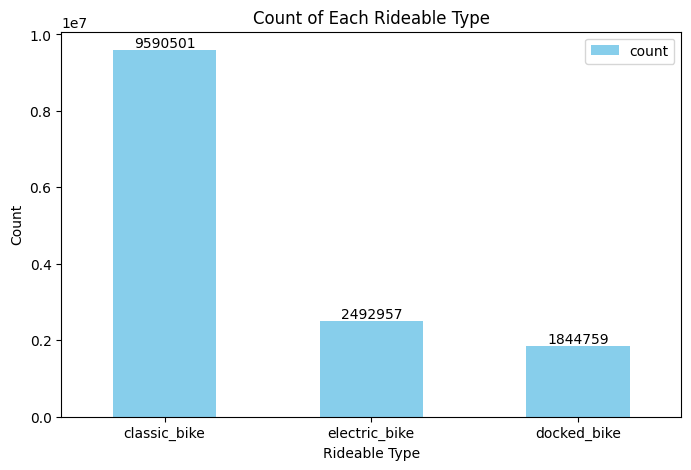

In [ ]:
plt.figure(figsize=(8, 5))
jumlah_rideable_type = __________.value_counts()
jumlah_rideable_type.plot(kind='bar', color='_______')
plt.xlabel('Rideable Type')
plt.ylabel('Count')
plt.legend()
plt.title('__________')
plt.xticks(rotation=0)
for i, count in enumerate(jumlah_rideable_type):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')
plt.show()


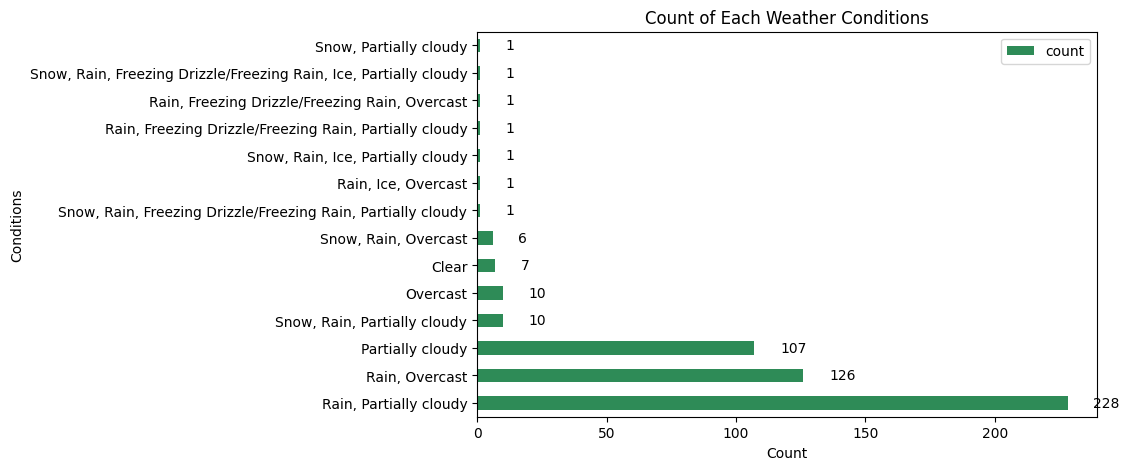

In [ ]:
weatherconditions_counts = weather['conditions'].value_counts()
plt.figure(figsize=(8, 5))
weatherconditions_counts.plot(kind='_____', color='seagreen')
plt.ylabel('Conditions')
plt.xlabel('Count')
plt.legend()
plt.title('Count of Each Weather Conditions')
plt.yticks(rotation=0)
for i, count in enumerate(weatherconditions_counts):
    plt.text(count + 10, i, str(count), ha='left', va='center')
plt.show()

# Pie Chat

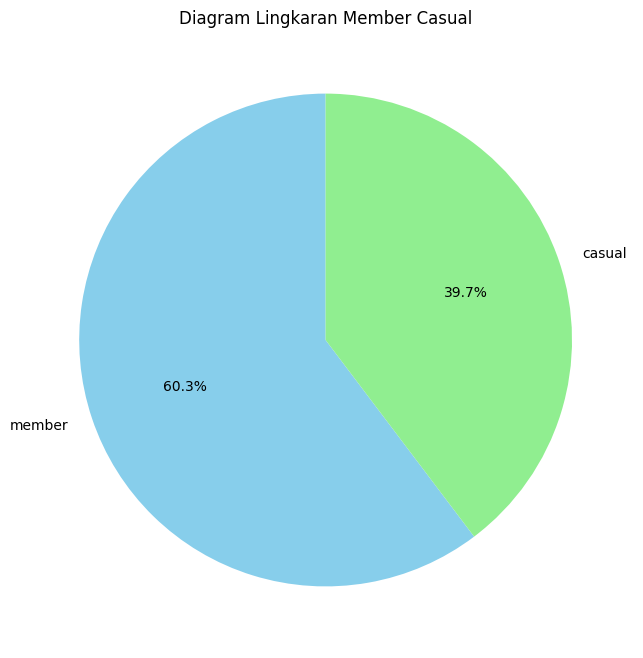

In [ ]:
membercasual_counts = data_bikes['member_casual'].value_counts()
plt.figure(figsize=(8, 8))
plt._____(_________, labels=membercasual_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Diagram Lingkaran Member Casual')
plt.show()

# Lineplot

<ipython-input-32-0e4befb1af3e>:8: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis='x', nbins=10)


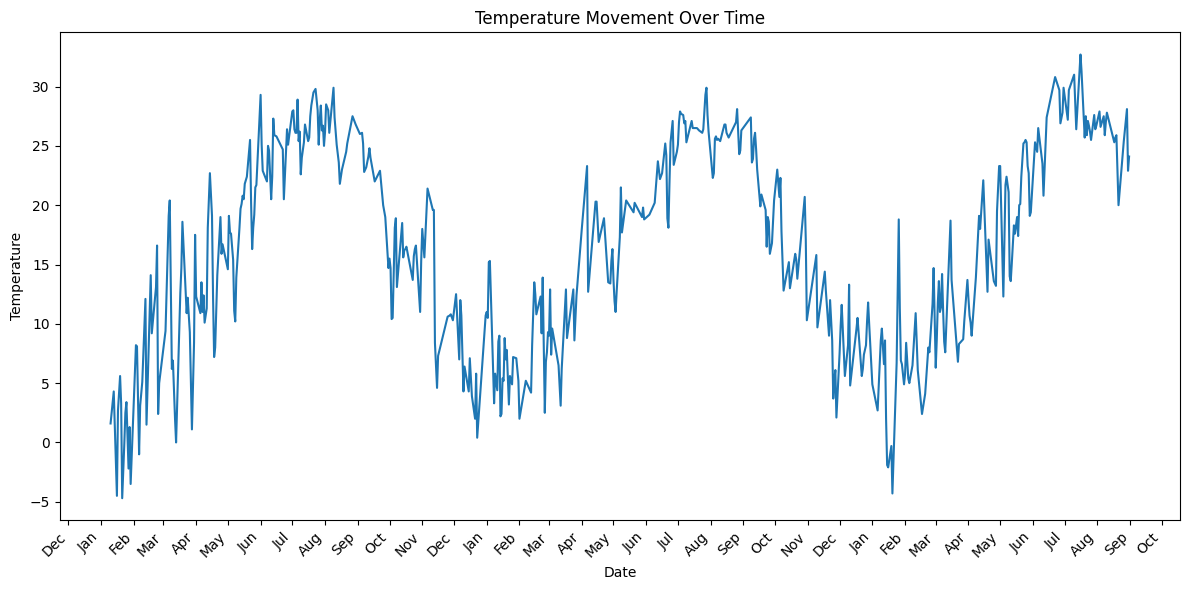

In [ ]:
weather['datetime'] = pd.______(weather['datetime'])
plt.figure(figsize=(12, 6))
plt.plot(weather['datetime'], weather['temp'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Movement Over Time')
plt.xticks(rotation=45, ha='right')
plt.locator_params(axis='x', nbins=10)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()

## **Multivariate Analysis**
# Corelation Heatmap

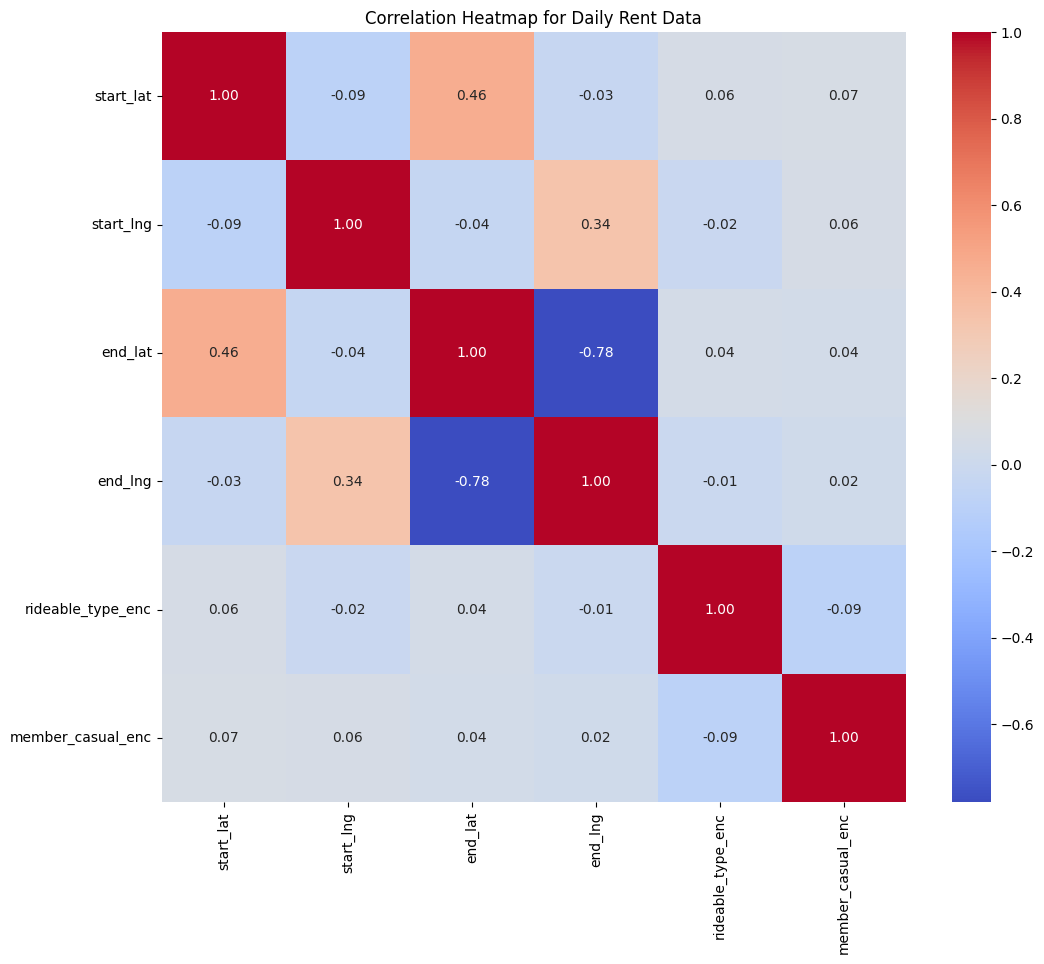

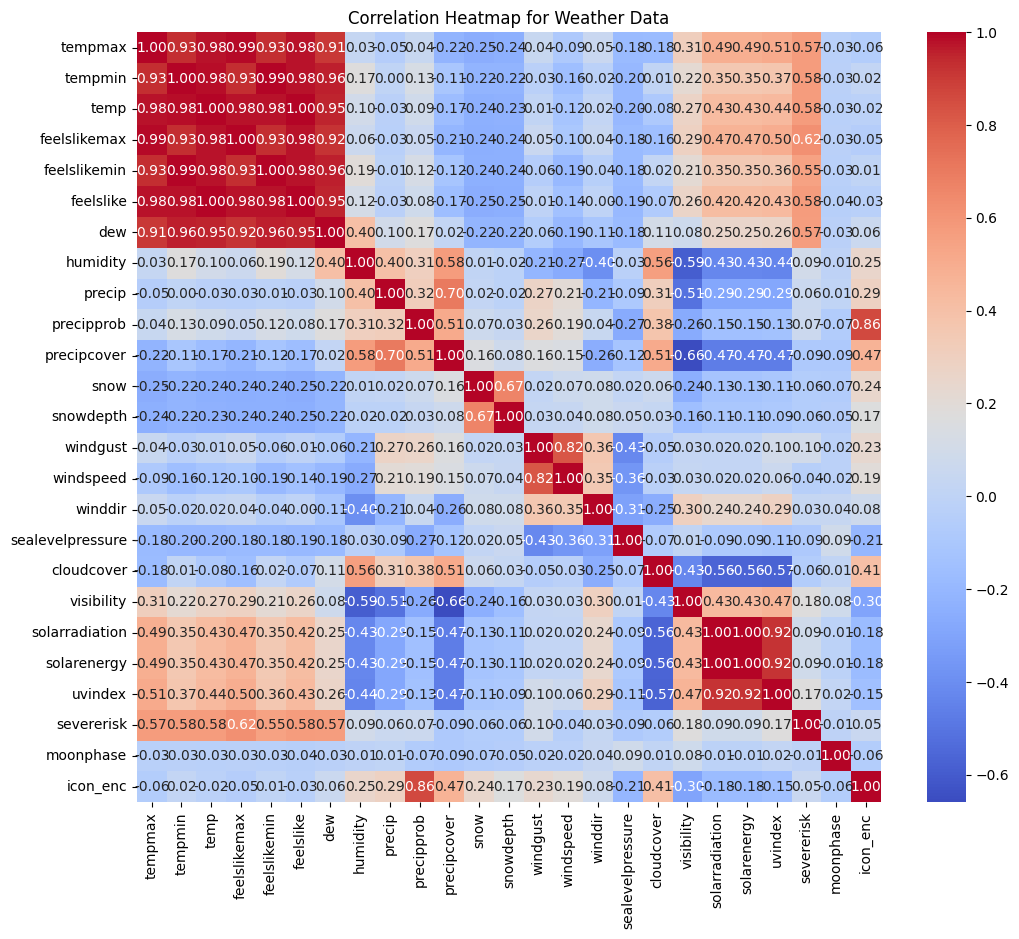

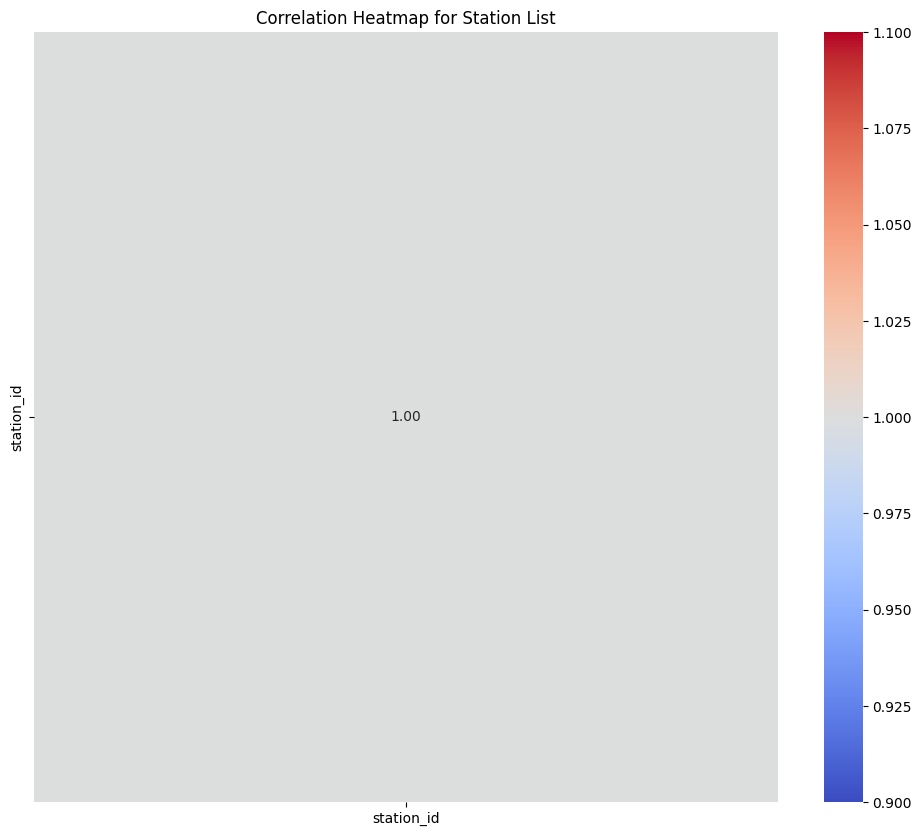

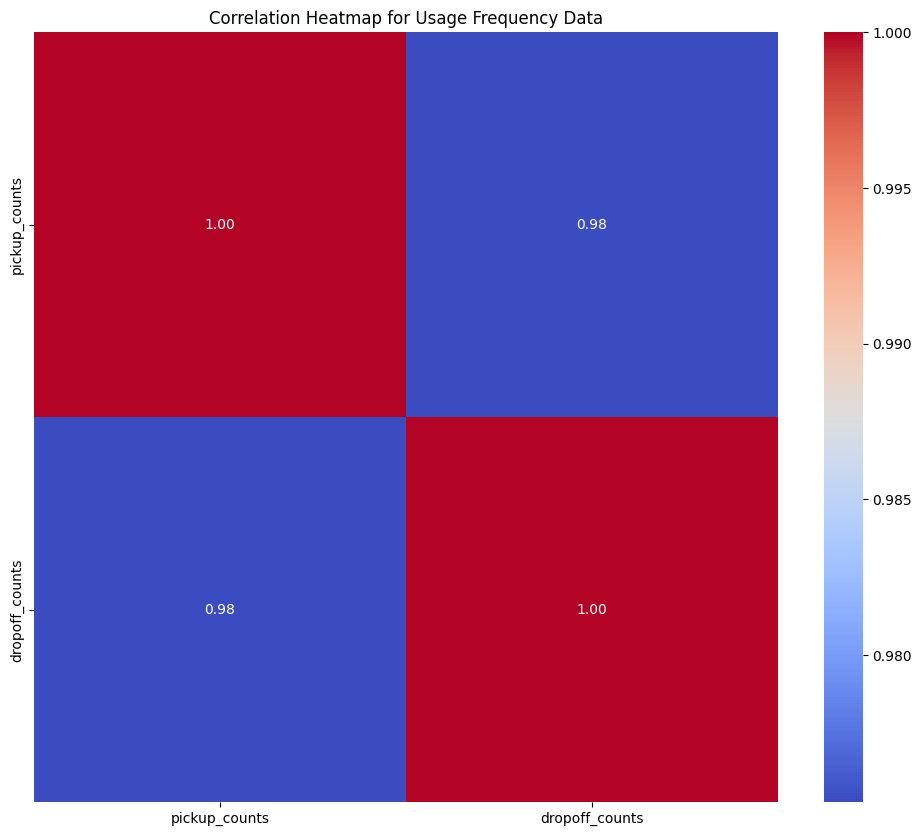

In [ ]:
numerical_cols_bikes = data_bikes.select_dtypes(__________).columns
correlation_matrix = data_bikes[numerical_cols_bikes].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(_________, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Daily Rent Data')
plt.show()

numerical_cols_weather = weather.select_dtypes(include=np.number).columns
correlation_matrix_w = weather[numerical_cols_weather].corr()
plt.figure(figsize=(_______))
sns.heatmap(correlation_matrix_w, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Weather Data')
plt.show()

numerical_cols_station_list = station_list.select_dtypes(include=np.number).columns
correlation_matrix_s = station_list[numerical_cols_station_list].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_s, annot=True, cmap='_______', fmt=".2f")
plt.title('Correlation Heatmap for Station List')
plt.show()

numerical_cols_usage_frequency = usage_frequency.select_dtypes(include=np.number).columns
correlation_matrix_f = usage_frequency[numerical_cols_usage_frequency].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_f, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Usage Frequency Data')
plt.show()